In [1]:
import pandas as pd
import numpy as np
import nltk
import re, string

nltk.download('stopwords') # Lidt of stopwords
nltk.download('punkt') # Punkt Sentence Tokenizer
nltk.download('averaged_perceptron_tagger') # tagging words with their parts of speech (POS)
nltk.download('wordnet') # lexical database of semantic relations between words 
nltk.download('omw-1.4') # nltk courpous lazy loader

[nltk_data] Downloading package stopwords to /home/rasello-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rasello-ai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rasello-ai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/rasello-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/rasello-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
train = 'data/train_set.csv'
df = pd.read_csv(train,header=0,encoding='ISO-8859-1')
len(df)

23615

In [3]:
df.drop_duplicates(subset ="text",keep = 'first', inplace = True)
len(df)

11348

In [4]:
df.head(5)

,label,text
0,85389000,pdscpm gb part of panel of chiller
1,85389000,nm p economical extended rot hand parts for c...
2,85389000,lv ma pd trip unit for cvs parts of circuit br...
3,85389000,lv na p trip unit for cvs switch parts of circ...
4,85389000,lv tmd pd trip unit for cvs parts of circuitbr...


<AxesSubplot:>

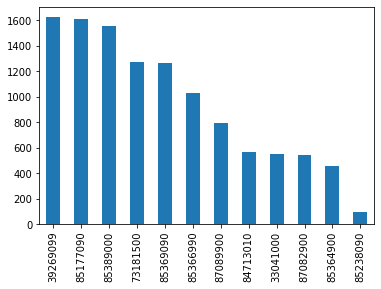

In [5]:
df['label'].value_counts().plot(kind='bar')

In [6]:
df.isna().sum()

label    0
text     0
dtype: int64

### Simple text cleaning processes: Some of the common text cleaning process involves:
* Removing punctuations, special characters, URLs & hashtags
* Removing leading, trailing & extra white spaces/tabs
* Typos, slangs are corrected, abbreviations are written in their long forms

### Stop-word removal
* removing words like , ‘i’,’you’,’a’,’the’,’he’,’which’ etc.

### Stemming 
* slicing the end or the beginning of words with the intention of removing affixes(prefix/suffix)
* information -> inform or having -> hav

### Lemmatization
* It is the process of reducing the word to its base form
* information -> information or having -> have

In [7]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() # to lowercase
    
    text = text.strip()  
    text = re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) # removing numbers
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip()) # removing all the puncatation
    text = re.sub(r'\d',' ',text) # removing tariling space
    text = re.sub(r'\s+',' ',text) 
    return text

In [8]:
from nltk.corpus import stopwords

# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [10]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

df['clean_text'] = df['text'].apply(lambda x: finalpreprocess(x))
df.head()

,label,text,clean_text
0,85389000,pdscpm gb part of panel of chiller,pdscpm gb part panel chiller
1,85389000,nm p economical extended rot hand parts for c...,nm p economical extend rot hand part circuit b...
2,85389000,lv ma pd trip unit for cvs parts of circuit br...,lv pd trip unit cv part circuit breaker
3,85389000,lv na p trip unit for cvs switch parts of circ...,lv na p trip unit cv switch part circuit breaker
4,85389000,lv tmd pd trip unit for cvs parts of circuitbr...,lv tmd pd trip unit cv part circuitbreakers


### Few More steps

In [11]:
# Create a new column 'category_id' with encoded categories 
df['category_id'] = df['label'].factorize()[0]
category_id_df = df[['label', 'category_id']].drop_duplicates()

# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)

In [91]:
df['clean_text_tok']=[nltk.word_tokenize(i) for i in df['clean_text']]

In [92]:
df.head()

,label,text,clean_text,category_id,clean_text_tok
0,85389000,pdscpm gb part of panel of chiller,pdscpm gb part panel chiller,0,"[pdscpm, gb, part, panel, chiller]"
1,85389000,nm p economical extended rot hand parts for c...,nm p economical extend rot hand part circuit b...,0,"[nm, p, economical, extend, rot, hand, part, c..."
2,85389000,lv ma pd trip unit for cvs parts of circuit br...,lv pd trip unit cv part circuit breaker,0,"[lv, pd, trip, unit, cv, part, circuit, breaker]"
3,85389000,lv na p trip unit for cvs switch parts of circ...,lv na p trip unit cv switch part circuit breaker,0,"[lv, na, p, trip, unit, cv, switch, part, circ..."
4,85389000,lv tmd pd trip unit for cvs parts of circuitbr...,lv tmd pd trip unit cv part circuitbreakers,0,"[lv, tmd, pd, trip, unit, cv, part, circuitbre..."


In [14]:
from sklearn.model_selection import train_test_split

#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"],
                                                    df["category_id"],
                                                    test_size=0.2,shuffle=True)

## Bag Of Words
1. Count Vectors
2. Term Frequency-Inverse Document Frequencies (tf-Idf)

### Limitations
* It is only useful as a lexical level feature.
* Synonymities are neglected.
* It doesn't capture semantic.
* The highest TF-IDF score may not make sense with the topic of the document, since IDF gives high weight if the DF of a term is low.
* It neglects the sequence of the terms.

In [15]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer # Count Vectors
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF

#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True) # we will use "tfidf_vectorizer" in prediction

X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [16]:
X_train_vectors_tfidf.shape

(9078, 11690)

## Word Embedding
1. with Word2Vec

In [19]:
#Word2Vec
# Word2Vec runs on tokenized sentences
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_test_tok= [nltk.word_tokenize(i) for i in X_test]

In [94]:
import gensim

#building Word2Vec model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))
        
    def fit(self, X, y):
            return self
    def transform(self, X):
            return np.array([
                np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                        or [np.zeros(self.dim)], axis=0)
                for words in X
            ])
        
gen_model = gensim.models.Word2Vec(sentences=df['clean_text_tok'],workers=4,min_count=1)
w2v = dict(zip(gen_model.wv.index_to_key, gen_model.wv.vectors))

In [96]:
w2v_model = MeanEmbeddingVectorizer(w2v)

In [97]:
# converting text to numerical data using Word2Vec
X_train_vectors_w2v = w2v_model.transform(X_train_tok)
X_val_vectors_w2v = w2v_model.transform(X_test_tok)

In [100]:
X_train_vectors_w2v.shape

(9078, 100)

## SkLearn Models

In [101]:
from sklearn import svm
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

### BoW

In [116]:
svm_model_bow = svm.SVC(decision_function_shape='ovo',probability=True)
svm_model_bow.fit(X_train_vectors_tfidf,y_train)

#Predict y value for test dataset
y_predict = svm_model_bow.predict(X_test_vectors_tfidf)

In [117]:
print(classification_report(y_test,y_predict))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict))
print('\n')
print('SVM Classification Accuracy',svm_model_bow.score(X_test_vectors_tfidf,y_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       310
           1       0.94      0.95      0.94       307
           2       0.86      0.75      0.80       259
           3       0.72      0.89      0.79       322
           4       0.97      0.87      0.92       270
           5       0.91      0.83      0.87       203
           6       0.86      0.88      0.87        86
           7       0.94      0.71      0.81        21
           8       0.79      0.77      0.78       159
           9       1.00      0.98      0.99       124
          10       0.88      0.75      0.81       107
          11       0.99      0.97      0.98       102

    accuracy                           0.87      2270
   macro avg       0.89      0.86      0.87      2270
weighted avg       0.88      0.87      0.87      2270

Confusion Matrix:
 [[281   0   7  14   2   2   3   0   1   0   0   0]
 [  7 292   0   7   1   0   0   0   0   0   0   0]
 [ 15   3 19

### Word2Vec

In [144]:
svm_model_w2v = svm.SVC(decision_function_shape='ovo',probability=True)
svm_model_w2v.fit(X_train_vectors_w2v,y_train)

#Predict y value for test dataset
y_predict = svm_model_w2v.predict(X_val_vectors_w2v)

In [145]:
print(classification_report(y_test,y_predict))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict))
print('\n')
print('SVM Classification Accuracy',svm_model_w2v.score(X_val_vectors_w2v,y_test))

/home/rasello-ai/PyCharm Projects/python-problems/NLP_classification/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rasello-ai/PyCharm Projects/python-problems/NLP_classification/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rasello-ai/PyCharm Projects/python-problems/NLP_classification/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

              precision    recall  f1-score   support

           0       0.36      0.72      0.48       310
           1       0.84      0.83      0.84       307
           2       0.60      0.37      0.46       259
           3       0.44      0.46      0.45       322
           4       0.72      0.60      0.66       270
           5       0.68      0.53      0.60       203
           6       0.59      0.43      0.50        86
           7       0.00      0.00      0.00        21
           8       0.45      0.62      0.53       159
           9       1.00      0.81      0.89       124
          10       0.00      0.00      0.00       107
          11       0.79      0.64      0.71       102

    accuracy                           0.57      2270
   macro avg       0.54      0.50      0.51      2270
weighted avg       0.59      0.57      0.56      2270

Confusion Matrix:
 [[224   3  18  42   9   1   4   0   8   0   0   1]
 [ 16 256   0  21   3   0   0   0  11   0   0   0]
 [ 59   5  9

# GETTING test_data FOR NEW PREDICTION

In [146]:
test = 'data/test_set.csv'
df_test = pd.read_csv(train,header=0,encoding='ISO-8859-1')
len(df_test)

5894

In [147]:
df_test.head(2)

,text
0,lv tmd pd trip unit for nh parts of circuit br...
1,module tm analog outputs analog output expansi...


In [148]:
# Pre-processing the new dataset
df_test['clean_text'] = df_test['text'].apply(lambda x: finalpreprocess(x)) #preprocess the data

In [149]:
# converting words to numerical data using tf-idf
X_vector=tfidf_vectorizer.transform(df_test['clean_text'])

In [150]:
# converting words to numerical data using w2v
X_Test_Tok = [nltk.word_tokenize(i) for i in df_test['clean_text'].values]  
w2v_x_test = w2v_model.transform(X_Test_Tok)

In [151]:
#use the tf-idf model to predict 'target' value for the new dataset 
Y_pred = svm_model_bow.predict(X_vector)
df_test['target_bow'] = Y_pred
df_test['label_bow'] = df_test['target_bow'].apply(lambda x: id_to_category[x])

In [152]:
#use the w2v model to predict 'target' value for the new dataset 
Y_pred = svm_model_w2v.predict(w2v_x_test)
df_test['target_w2v'] = Y_pred
df_test['label_w2v'] = df_test['target_w2v'].apply(lambda x: id_to_category[x])

In [153]:
df_test

,text,clean_text,target_bow,label_bow,target_tfidf,label_tfidf
0,lv tmd pd trip unit for nh parts of circuit br...,lv tmd pd trip unit nh part circuit breaker,0,85389000,0,85389000
1,module tm analog outputs analog output expansi...,module tm analog output analog output expansio...,0,85389000,0,85389000
2,command group t iii mechanismt p parts forcir...,command group iii mechanismt p part forcircuit...,0,85389000,0,85389000
3,parts of relayelectrical contact issu e f xxup,part relayelectrical contact issu e f xxup,0,85389000,0,85389000
4,parts for programmable logic controllers dm ...,part programmable logic controller dm part plc...,0,85389000,0,85389000
...,...,...,...,...,...,...
5889,gdf latitude portable computernotebookassyba...,gdf latitude portable computernotebookassybase...,11,84713010,0,85389000
5890,cfjx precision portable computernotebook ass...,cfjx precision portable computernotebook assyb...,11,84713010,0,85389000
5891,eguujnnincnnnuas xuup acj note book computer l...,eguujnnincnnnuas xuup acj note book computer l...,11,84713010,11,84713010
5892,egubjnninnnnums wwup note book computer laptop...,egubjnninnnnums wwup note book computer laptop...,11,84713010,11,84713010


In [158]:
(df_test['target_bow']).value_counts()

0     735
2     698
1     641
3     618
4     484
8     468
5     467
7     395
9     384
6     358
11    328
10    318
Name: target_bow, dtype: int64

### Keras Model

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def batch_generator_shuffle(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    np.random.shuffle(index)
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield tf.expand_dims(X_batch, 0), X_batch
        if (counter > number_of_batches):
            np.random.shuffle(index)
            counter=0

model = Sequential()
model.add(Dense(128, activation='relu',input_shape=(32,11666)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

model.fit_generator(generator=batch_generator_shuffle(X_train_vectors_tfidf, y_train, 32),
                    epochs=5, 
                    validation_data=(X_test_vectors_tfidf, y_test),
                    steps_per_epoch=X_train_vectors_tfidf.shape[0]//32)